# Phase A: Data Quality & Business Understanding

## Project Overview
This notebook focuses on the initial assessment of the Customer Support Ticket dataset. We will perform data quality checks, handle missing values, and establish the business context for the optimization project.

## Business Objectives
1. **Confirm Data Integrity**: Ensure timestamps, categorical values, and IDs are clean.
2. **Identify Initial Patterns**: Understand ticket volume distribution across categories and priorities.
3. **Define Baseline Metrics**: Established average resolution times and satisfaction scores.

## Core Business KPIs
- **Average First Response Time (FRT)**: Time from ticket creation to the first agent response.
- **Average Time to Resolution (TTR)**: Total duration from ticket creation to resolution.
- **SLA Breach Rate**: % of tickets exceeding response/resolution thresholds.
- **Customer Satisfaction (CSAT)**: Average rating provided by customers.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)
sns.set_palette("viridis")
plt.style.use('ggplot')

In [19]:
import sys
print(sys.executable)

/Users/davidezieshi/Downloads/ba-projects/Customer Support Ticket Dataset/.venv/bin/python


## 1. Load Data

In [20]:
df = pd.read_csv('../data/customer_support_tickets.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14,2023-06-01 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 7:29,2023-06-01 1:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 0:12,2023-06-01 19:53,1.0


## 2. Data Quality Check

In [21]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [22]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for unique values in categorical columns
cat_cols = ['Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel', 'Product Purchased']
for col in cat_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

Duplicate rows: 0

Unique values in Ticket Type:
['Technical issue' 'Billing inquiry' 'Cancellation request'
 'Product inquiry' 'Refund request']

Unique values in Ticket Status:
['Pending Customer Response' 'Closed' 'Open']

Unique values in Ticket Priority:
['Critical' 'Low' 'High' 'Medium']

Unique values in Ticket Channel:
['Social media' 'Chat' 'Email' 'Phone']

Unique values in Product Purchased:
['GoPro Hero' 'LG Smart TV' 'Dell XPS' 'Microsoft Office'
 'Autodesk AutoCAD' 'Microsoft Surface' 'Philips Hue Lights'
 'Fitbit Versa Smartwatch' 'Dyson Vacuum Cleaner' 'Nintendo Switch'
 'Microsoft Xbox Controller' 'Nintendo Switch Pro Controller'
 'Nest Thermostat' 'Sony PlayStation' 'GoPro Action Camera' 'Xbox'
 'LG Washing Machine' 'Canon EOS' 'HP Pavilion' 'Amazon Kindle'
 'Lenovo ThinkPad' 'Fitbit Charge' 'Adobe Photoshop' 'Google Pixel'
 'Amazon Echo' 'PlayStation' 'Samsung Galaxy' 'iPhone' 'LG OLED'
 'Sony Xperia' 'Apple AirPods' 'Sony 4K HDR TV' 'Canon DSLR Camera'
 'Roomba Robo

## 3. Data Preprocessing

We need to ensure date columns are in datetime format and handle any potential missingness.

In [23]:
# Convert date columns
date_cols = ['Date of Purchase', 'First Response Time', 'Time to Resolution']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Simple handle for missing values (if any)
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].median())
df['Resolution'] = df['Resolution'].fillna("No resolution recorded")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

## 4. Initial Business Overview

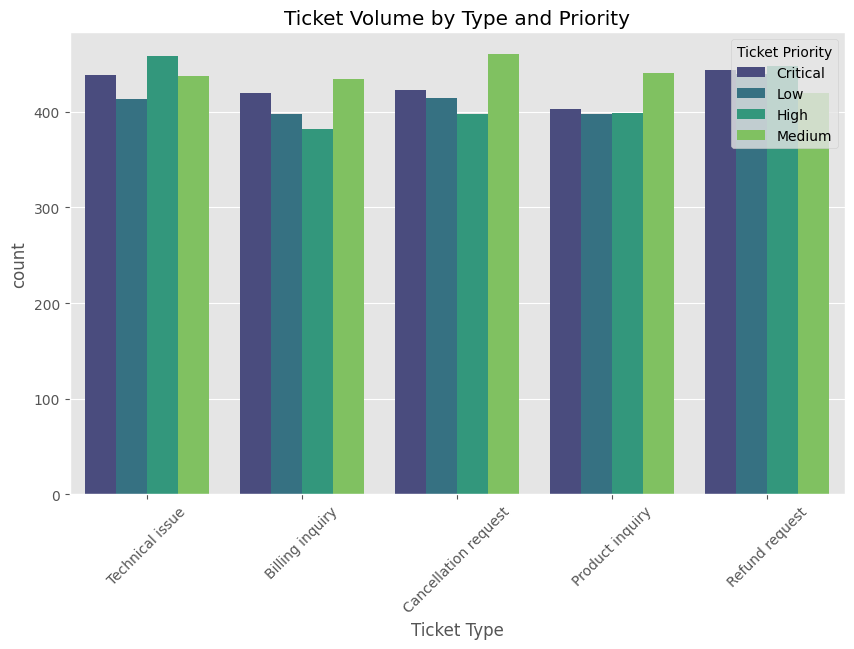

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ticket Type', hue='Ticket Priority', palette='viridis')
plt.title('Ticket Volume by Type and Priority')
plt.xticks(rotation=45)
plt.show()

## 5. Summary Statistics

In [25]:
summary = df.describe(include='all')
summary.to_csv('../outputs/summary_tables/initial_data_profile.csv')
summary

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,8469,8469,8469,5650,2769,8469.000000
unique,NaN,8028,8320,NaN,3,42,NaN,5,16,8077,3,2770,4,4,NaN,NaN,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,NaN,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,No resolution recorded,Medium,Email,NaN,NaN,NaN
freq,NaN,5,4,NaN,2896,240,NaN,1752,576,25,2881,5700,2192,2143,NaN,NaN,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,2020-12-30 01:35:13.071201024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 11:26:17.617699328,2023-06-01 11:16:51.722643456,2.997166
min,1.000000,NaN,NaN,18.000000,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31 21:55:00,2023-05-31 21:53:00,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,2020-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 05:24:00,2023-06-01 05:34:00,3.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 11:26:00,2023-06-01 11:17:00,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 17:37:00,2023-06-01 17:07:00,3.000000
max,8469.000000,NaN,NaN,70.000000,NaN,NaN,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-02 00:54:00,2023-06-02 00:55:00,5.000000
